In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Train'
valid_path = '/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 40s 19s/step - loss: 7.9866 - accuracy: 0.3594 - val_loss: 4.1631 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 713ms/step - loss: 5.8127 - accuracy: 0.2812 - val_loss: 9.4903 - val_accuracy: 0.1379
Epoch 3/50
2/2 [==============================] - 1s 710ms/step - loss: 6.0215 - accuracy: 0.4219 - val_loss: 10.8550 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 719ms/step - loss: 6.1851 - accuracy: 0.3906 - val_loss: 8.2921 - val_accuracy: 0.1724
Epoch 5/50
2/2 [==============================] - 1s 705ms/step - loss: 4.2628 - accuracy: 0.4219 - val_loss: 2.1208 - val_accuracy: 0.3793
Epoch 6/50
2/2 [==============================] - 1s 726ms/step - loss: 1.4860 - accuracy: 0.5469 - val_loss: 3.1695 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 715ms/step - loss: 4.0786 - accuracy: 0.4062 - val_loss: 2.0493 - val_accuracy: 0.5517
Epoch 8/50
2/2 [====

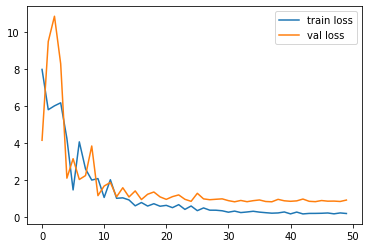

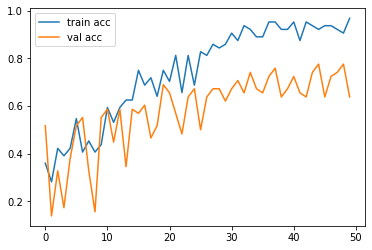

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [15]:
y_pred = model.predict(test_set)
y_pred

array([[3.32413800e-02, 7.99022056e-03, 9.58768427e-01],
       [1.76900104e-02, 3.40068996e-01, 6.42241001e-01],
       [2.67961845e-02, 7.23023832e-01, 2.50180036e-01],
       [2.11994704e-02, 3.79173815e-01, 5.99626780e-01],
       [1.17278606e-01, 3.97707671e-01, 4.85013723e-01],
       [1.14412317e-02, 9.07088041e-01, 8.14706460e-02],
       [4.19872254e-02, 3.16304386e-01, 6.41708374e-01],
       [1.25274947e-02, 8.10483634e-01, 1.76988915e-01],
       [8.49030733e-01, 8.33200738e-02, 6.76492006e-02],
       [6.39462052e-03, 9.64075148e-01, 2.95302030e-02],
       [2.86719091e-02, 2.12838012e-03, 9.69199777e-01],
       [4.31576341e-01, 1.82474673e-01, 3.85948926e-01],
       [7.60662556e-02, 5.48006237e-01, 3.75927478e-01],
       [9.37967654e-03, 3.03719845e-03, 9.87583101e-01],
       [1.79687664e-01, 3.45768243e-01, 4.74544108e-01],
       [2.16203760e-02, 2.01197594e-01, 7.77181983e-01],
       [3.60762328e-02, 2.07018296e-04, 9.63716745e-01],
       [3.09193716e-03, 1.98146

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [18]:
image.img_data

AttributeError: ignored

In [19]:
img=image.load_img('/content/drive/MyDrive/AA - My project/Transfer_learning_carprediction/Datasets/Datasets/Test/lamborghini/10.jpg',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

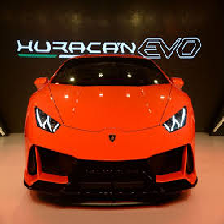

In [20]:
img

In [21]:
x.shape

(224, 224, 3)

In [22]:
x=x/255

In [23]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[0.0164621 , 0.16970731, 0.8138306 ]], dtype=float32)

In [25]:
a=np.argmax(model.predict(img_data), axis=1)

In [26]:
a==1

array([False])